---
# Time Series in Pandas


---
## 1. Time Series - Definition:
A __Time Series__ is a __sequence of data points that occur in successive order over a time period__. 

The concept of __Time Series__ plays a central role in many fields of science - it is incredibly useful in understanding a dataset, allows us to explore its features, spot trends and data fluctuations, and ultimately conduct all sorts of statistical and predictive analysis.

In its essence, a __Time Series__ of a given __variable__ is a collection of discrete variable observations, made over a continuous time period. 



The below linechart visualises a collection of 'Share Price' data points, observed throughout the years:


<div>
<img src="attachment:time_series.PNG" width="500"/>
</div>

---
## 2. Time Series in Pandas:

In Pandas, __Time Series__ is a __Series Object, indexed by time__. Typically time series data is numeric.

For the purpose of this lesson, we will be using __yahoofinancials__ - a powerful financial data module, used for pulling both fundamental and technical data from Yahoo Financials. Yahoo Finance have large datasets of historical financials such as stock prices, stock betas (measuring the volatility of a stock), etc.

For more details on __yahoofinancials__ visit: https://pypi.org/project/yahoofinancials/


In [12]:
# Imports
import yahoofinancials
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np

In [13]:
# Import financial data on Apple (AAPL) 
# We use .get_historical_price_data(start_date, end_date, time_interval) to pull daily prices of Apple stocks 
data = YahooFinancials('AAPL').get_historical_price_data('2019-01-01', '2020-01-01', 'daily')

__NB__: The __data__ object is in JSON format:
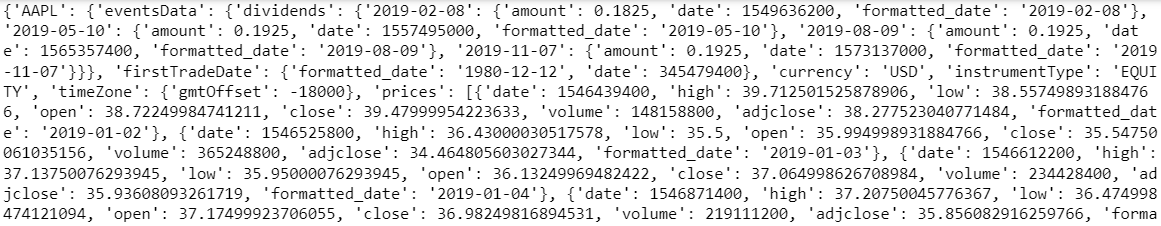


In [14]:
# Let's explore the keys of dictionary data['AAPL']
data['AAPL'].keys()

dict_keys(['eventsData', 'firstTradeDate', 'currency', 'instrumentType', 'timeZone', 'prices'])

In [15]:
# We are interested in analysing Apple Stock Prices
# A quick exploration on the object data['AAPL']['Prices'] shows that it is a list of dictionaries!
# But we know that we can construct a DataFrame out of a List of Dictionaries --> each dictionary is a row

prices = pd.DataFrame(data['AAPL']['prices'])
prices.head()

,date,high,low,open,close,volume,adjclose,formatted_date
0,1546439400,39.712502,38.557499,38.722500,39.480000,148158800,38.221367,2019-01-02
1,1546525800,36.430000,35.500000,35.994999,35.547501,365248800,34.414238,2019-01-03
2,1546612200,37.137501,35.950001,36.132500,37.064999,234428400,35.883358,2019-01-04
3,1546871400,37.207500,36.474998,37.174999,36.982498,219111200,35.803486,2019-01-07
4,1546957800,37.955002,37.130001,37.389999,37.687500,164101200,36.486012,2019-01-08


Finally, let's conduct some simple __ETL__ on our DataFrame:
- drop unnecessary columns
- convert column 'formatted_date' into actual date object
- set the index of the DataFrame to be 'formatted_date' column

In [16]:
# Drop columns
prices.drop(columns = ['date', 'volume'], inplace = True)

# Convert 'formatted_date' into a datetime object
prices['formatted_date'] = pd.to_datetime(prices['formatted_date'])
display(prices)
# Reset index to be our date column
prices.set_index('formatted_date', inplace = True)

# Take a peak
prices.head()

,high,low,open,close,adjclose,formatted_date
0,39.712502,38.557499,38.722500,39.480000,38.221367,2019-01-02
1,36.430000,35.500000,35.994999,35.547501,34.414238,2019-01-03
2,37.137501,35.950001,36.132500,37.064999,35.883358,2019-01-04
3,37.207500,36.474998,37.174999,36.982498,35.803486,2019-01-07
4,37.955002,37.130001,37.389999,37.687500,36.486012,2019-01-08
...,...,...,...,...,...,...
247,71.222504,70.730003,71.172501,71.067497,69.835587,2019-12-24
248,72.495003,71.175003,71.205002,72.477501,71.221153,2019-12-26
249,73.492500,72.029999,72.779999,72.449997,71.194122,2019-12-27
250,73.172501,71.305000,72.364998,72.879997,71.616676,2019-12-30


,high,low,open,close,adjclose
formatted_date,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,38.221367
2019-01-03,36.430000,35.500000,35.994999,35.547501,34.414238
2019-01-04,37.137501,35.950001,36.132500,37.064999,35.883358
2019-01-07,37.207500,36.474998,37.174999,36.982498,35.803486
2019-01-08,37.955002,37.130001,37.389999,37.687500,36.486012


---
## 2.1 Time Series - Resampling:

Great! So far we have managed to get our financial data in the form of a DataFrame, we cleaned it and set its index to be a __datetime__ column! 

Recall that every column in a DataFrame is a Series - this, together with the __Date__ index, allows us to interpret and manipulate the DataFrame as a __Collection of Time Series__!

In what follows we are going to explore the concept of __Time Series Resampling__:
- __Downsampling__: the process of reducing the sampling rate of observation
    - e.g. donsampling from __daily__ to __monthly__ observations
- __Upsampling__: the process of expanding the sampling rate of observation
     - e.g. upsampling from __yearly__ to __monthly__ observations
     
Syntax:
- `df.resample('frequency').aggregation_function()` where `frequency = M, D, etc.` 

In [6]:
# Downsample daily data to monthly. (Index needs to be a date index)
# Resulting DataFrame has only one record per month and all column values are the monthly averages
prices_m = prices.resample('M').mean()
prices_m

,high,low,open,close,adjclose
formatted_date,,,,,
2019-01-31,38.882619,37.986905,38.402143,38.541548,37.312833
2019-02-28,43.220395,42.632895,42.848027,42.931973,41.694721
2019-03-31,46.232976,45.352738,45.805953,45.823453,44.552851
2019-04-30,50.394286,49.657738,49.966666,50.129048,48.739059
2019-05-31,48.342386,47.301250,47.734659,47.818409,46.609994
2019-06-30,48.699000,47.808250,48.166125,48.242250,47.085210
2019-07-31,51.682386,50.978523,51.262954,51.304091,50.073614
2019-08-31,51.902386,50.712386,51.315568,51.239432,50.149730
2019-09-30,54.867750,53.984875,54.431875,54.498750,53.393751


In [7]:
# Upsample monthly data to daily
prices_m_d = prices_m.resample('D').mean()
display(prices_m_d)

# What happens is, we created a bunch of NaN rows in the DataFrame
# Let's handle missing data using linear interpolation
prices_m_d.interpolate().head(10)

,high,low,open,close,adjclose
formatted_date,,,,,
2019-01-31,38.882619,37.986905,38.402143,38.541548,37.312833
2019-02-01,NaN,NaN,NaN,NaN,NaN
2019-02-02,NaN,NaN,NaN,NaN,NaN
2019-02-03,NaN,NaN,NaN,NaN,NaN
2019-02-04,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,NaN,NaN,NaN,NaN,NaN
2019-12-28,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN


,high,low,open,close,adjclose
formatted_date,,,,,
2019-01-31,38.882619,37.986905,38.402143,38.541548,37.312833
2019-02-01,39.037540,38.152833,38.560924,38.698348,37.469329
2019-02-02,39.192461,38.318761,38.719706,38.855149,37.625825
2019-02-03,39.347381,38.484689,38.878487,39.011950,37.782321
2019-02-04,39.502302,38.650618,39.037269,39.168751,37.938817
2019-02-05,39.657222,38.816546,39.196051,39.325552,38.095313
2019-02-06,39.812143,38.982474,39.354832,39.482353,38.251809
2019-02-07,39.967063,39.148402,39.513614,39.639154,38.408305
2019-02-08,40.121984,39.314330,39.672395,39.795955,38.564801


<AxesSubplot:xlabel='formatted_date'>

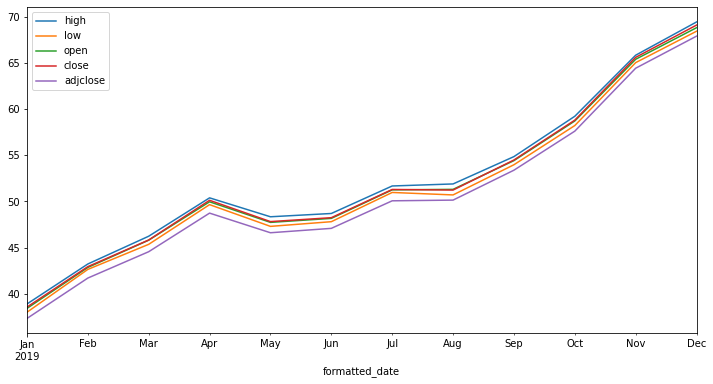

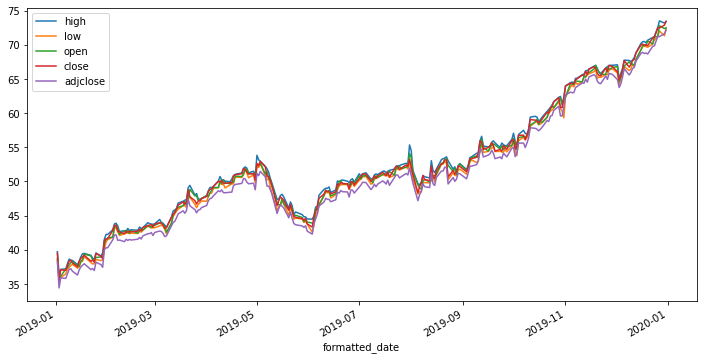

In [8]:
# Finally, let's plot the time series
prices_m.plot(figsize = (12,6))
prices.plot(figsize = (12,6))

---
## 2.2 Time Series - Rolling Statistics:
A __Rolling Statistics__ is a method, which takes a moving window of time and performs a specific calculation over the observations in that time window. 

One of the more popular rolling statistics is the __Moving Average__ - at any data point, it takes the average of of the last __X__ observations (say, last 30 daily observations) and returns a rolling average value. When performed across a Time Series, __Moving Average__ also returns a __Time Series of Averages__.

Rolling Statistics are conducted by using the `.rolling()` method:
- `series.rolling(X).aggregation_function` where `X = number of observations`

<AxesSubplot:xlabel='formatted_date'>

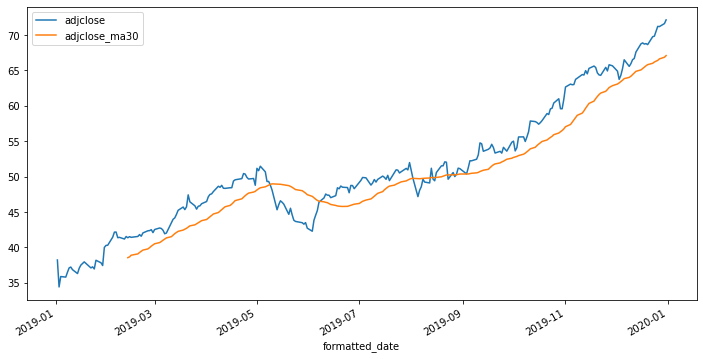

In [9]:
prices['adjclose_ma30'] = prices['adjclose'].rolling(30).mean()
prices[['adjclose', 'adjclose_ma30']].plot(figsize = (12,6))

---
## 2.3 Time Series - Other Methods:
Time Series in Pandas have many other interesting methods. Let's explore:
- __Shifting__ a Time Series by a time period (also known as __Lagging__) - `.shift()`
- Calculating the __Percentage Change__ between values in a Time Series - `pct_change()`
- __Differencing__ of a Time Series - taking the difference between consecutive values of a Time Series - `.diff()`

In [10]:
# Create a Series
s = prices['adjclose'].head(10).copy()
print('Initial Series:',s)
print('-------------------------------------')

# Shift the Series by 1 Period in Time
print('Shifted Series:',s.shift(1))
print('-------------------------------------')

# Take Percentage Change
print('% Change of Series:', s.pct_change())
print('-------------------------------------')

# Take First Difference of a s
print('First Difference of a Series:', s.diff(1))

Initial Series: formatted_date
2019-01-02    38.221371
2019-01-03    34.414234
2019-01-04    35.883358
2019-01-07    35.803482
2019-01-08    36.486012
2019-01-09    37.105610
2019-01-10    37.224205
2019-01-11    36.858738
2019-01-14    36.304485
2019-01-15    37.047527
Name: adjclose, dtype: float64
-------------------------------------
Shifted Series: formatted_date
2019-01-02          NaN
2019-01-03    38.221371
2019-01-04    34.414234
2019-01-07    35.883358
2019-01-08    35.803482
2019-01-09    36.486012
2019-01-10    37.105610
2019-01-11    37.224205
2019-01-14    36.858738
2019-01-15    36.304485
Name: adjclose, dtype: float64
-------------------------------------
% Change of Series: formatted_date
2019-01-02         NaN
2019-01-03   -0.099608
2019-01-04    0.042689
2019-01-07   -0.002226
2019-01-08    0.019063
2019-01-09    0.016982
2019-01-10    0.003196
2019-01-11   -0.009818
2019-01-14   -0.015037
2019-01-15    0.020467
Name: adjclose, dtype: float64
------------------------

---
## 3. Summary:
- A __Time Series__ is a sequence of data points that occur in successive order over a time period
- In Pandas, every numerical Series with a __Datetime Index__ can be viewed as a Time Series
- Time Series allows us to perform operations such as:
     - Resampling - `.resample()`
     - Rolling Statistics - `.rolling()`
     - Plotting Timelines - `.plot()`
     - Lagging, taking percentage changes and differencing - `.shift()`, `.pct_change()`, `.diff()`

---
## 4. Concept Check:

1. What is a __Time Series__? Explain in simple words the difference between a Pandas Series Object and a Time Series
2. Suppose we have a Time Series, containing a full year worth of observations on variable __X__ (that is 365 daily observations):
- What is the output produced by `.resample('M').mean()` - explain the concept of downsampling
- What is the output produced by `.resample('D').mean()` - explain the concept of upsampling
- After resampling to the initial frequency of observation (daily) what can you say about the majority of values in our Time Series. How could you best tackle them? What is the main difference between the initial Time Series and the final Time Series you have produced?